<a href="https://colab.research.google.com/github/jaewonlee16/torch_tutorial/blob/master/load_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.datasets import load_digits

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [14]:

digits = load_digits()
X = digits.data
Y = digits.target

X = torch.tensor(X, dtype=torch.float32).to(device)
Y = torch.tensor(Y, dtype=torch.int64).to(device)

In [15]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
    nn.ReLU(),
).to(device)

In [26]:
loss_ftn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters())

losses = []

In [27]:
epochs = 500

for epoch in range(epochs):
    optimizer.zero_grad()
    hypothesis = model.forward(X)
    loss = loss_ftn(hypothesis, Y)
    loss.backward()
    optimizer.step()


    losses.append(loss.item())

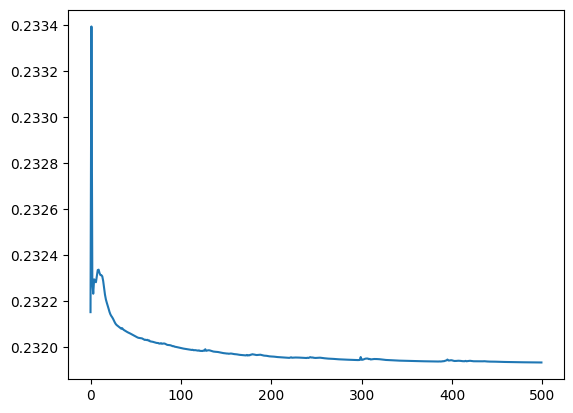

In [28]:
plt.plot(losses)

In [24]:
print(losses[-1])

0.2321525663137436
